<a href="https://colab.research.google.com/github/szeshiang/Deep-Learning/blob/main/24_Mar_24_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Types of Autoencoder**

1. Vanilla Autoencoder
2. Multilayer Autoencoder
3. Convolutional Autoencoder
4. Denoise Autoencoder-Remove noise from image


In [1]:
# import the library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
print('imported')

imported


In [2]:
# load the MNIST data
(X_train,_),(X_test,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Vanilla Autoencoder**

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
# convert to 1-D data
# reshape X_train & X_test
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [6]:
X_train=X_train.astype('float')/255.
X_test=X_test.astype('float')/255.

In [7]:
# parameters
input_size=784
hidden_size=64
output_size=784

In [8]:
# Functional keras API
from tensorflow.keras.layers import Input
x=Input(shape=(input_size,))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size,activation='sigmoid')(h)

In [9]:
autoencoder=Model(inputs=x,outputs=r)

In [10]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
autoencoder.compile(optimizer='adam',loss='mse')

In [12]:
epochs=5
batch_size=128

history=autoencoder.fit(X_train,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test,X_test))

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0443 - val_loss: 0.0228
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0175 - val_loss: 0.0129
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0107 - val_loss: 0.0086
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0062 - val_loss: 0.0055


In [13]:
# predict on test images
decoded_imgs=autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


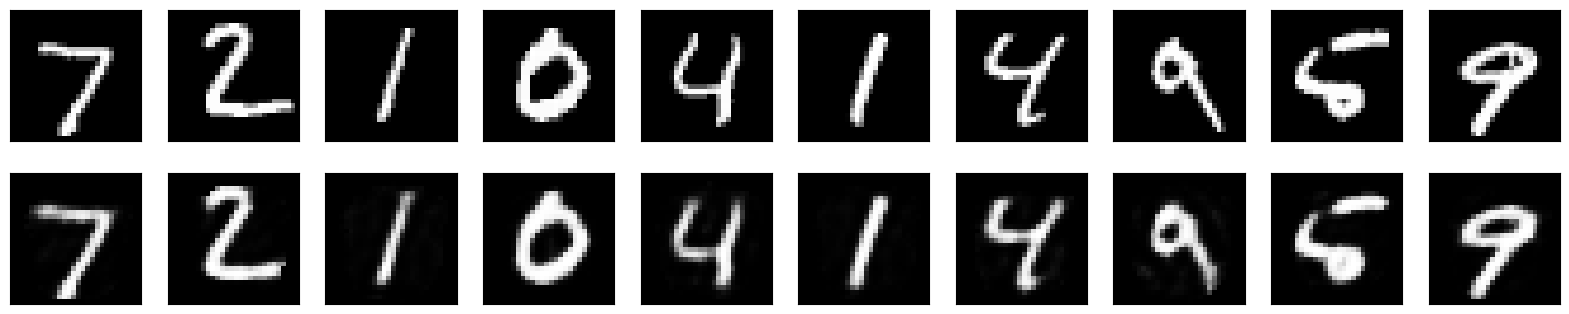

In [16]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [17]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0055


0.005472520366311073

^^ autoencoder differs from previous ANN/CNN calculation is that we are evaluating the reconstruction errors. Hence X_test, X_test instead of the X_test, y_test.

**Multilayer Autoencoder**

In [18]:
# parameters
input_size=784
hidden_size=128
code_size=64

In [20]:
# encoder
x=Input(shape=(input_size,))
hidden_1=Dense(hidden_size,activation='relu')(x)

h=Dense(code_size,activation='relu')(hidden_1)

#decoder part
hidden_2=Dense(hidden_size,activation='relu')(h)
r=Dense(input_size,activation='sigmoid')(hidden_2)

autoencoder1=Model(inputs=x,outputs=r)
autoencoder1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
autoencoder1.compile(optimizer='adam',loss='mse')
epochs=5
batch_size=128

history=autoencoder1.fit(X_train,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test,X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0408 - val_loss: 0.0186
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0154 - val_loss: 0.0124
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0114 - val_loss: 0.0101
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0086 - val_loss: 0.0078


In [22]:
autoencoder1.evaluate(X_test,X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0078


0.007830522954463959

313/313 [==============================] - 1s 3ms/step


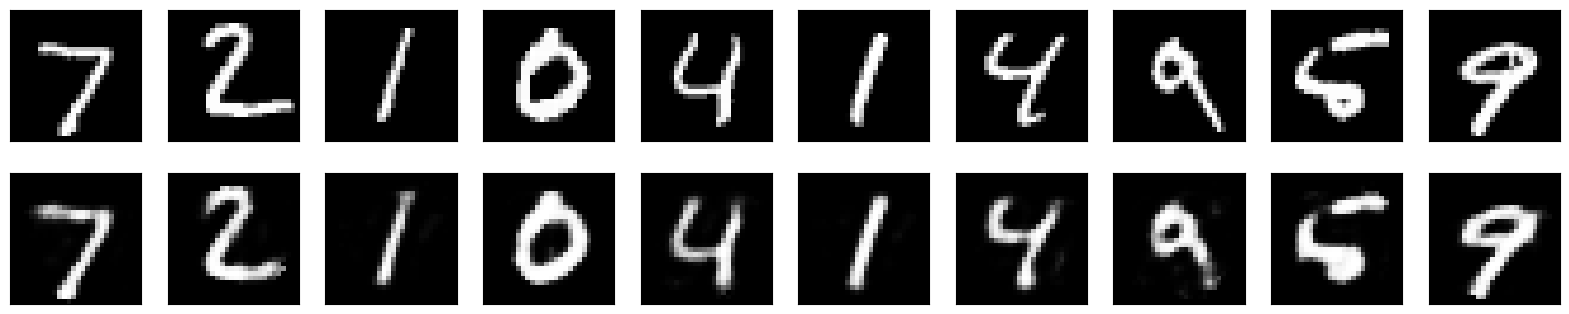

In [23]:
# predict on test images
decoded_imgs=autoencoder1.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Denoise Autoencoder**

In [24]:
# computer vision --- image processing --- fundamentals
# opencv2

In [25]:
# create noisy data
noise_factor=0.2
X_train_noisy=X_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape)
X_test_noisy=X_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_test.shape)

In [30]:
X_train_noisy=np.clip(X_train_noisy,0.,1.)
X_test_noisy=np.clip(X_test_noisy,0.,1.)

X_train_noisy.shape

# create the model
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Dense(500,input_dim=784,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(784,activation='sigmoid'))

784 --> 500 --> 300 --> 100 (code) : encoder >> decoder: --> 300 --> 500 --> 784

only 2 hidden layers (500 and 300); 100 is the code

In [31]:
model.compile(optimizer='adam',loss='mse')

In [32]:
epochs=5
batch_size=128

history=model.fit(X_train_noisy,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test_noisy,X_test))

Epoch 1/5
469/469 [==============================] - 17s 33ms/step - loss: 0.0347 - val_loss: 0.0169
Epoch 2/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0144 - val_loss: 0.0122
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 4/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 5/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0088 - val_loss: 0.0084


In [33]:
decoded_imgs=model.predict(X_test_noisy)

313/313 [==============================] - 3s 9ms/step


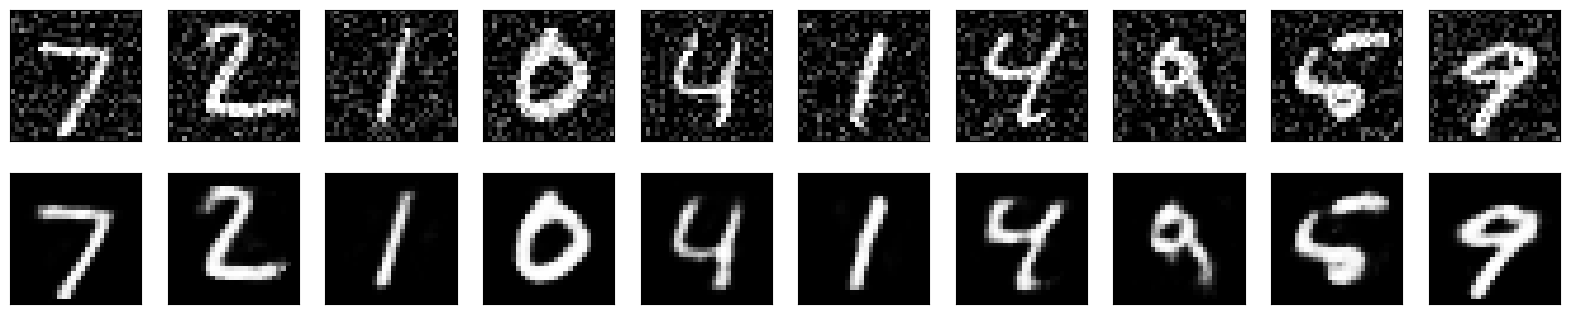

In [34]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [35]:
model.evaluate(X_test,X_test_noisy)

313/313 [==============================] - 4s 12ms/step - loss: 0.0270


0.027037344872951508